# ___Implementation of CNN with Keras using TensorFlow backend___

_To work through the core concepts of convolutional neural networks (CNNs), we’ll use a common dataset - the MNIST dataset—and a standard deep learning task-image classification._

_The goal here is to walk through an example that will illustrate the processes involved in building a convolutional neural network._

### ___Setup___
_In this step, we need to import Keras and other packages that we’re going to use in building our CNN. Import the following packages:_
* ___Sequential___ _is used to initialize the neural network._
* ___Conv2D___ _is used to make the convolutional network work with images._
* ___MaxPooling2D___ _is used to add the pooling layers._
* ___Flatten___ _is the function that converts the pooled feature map to a single column, which is then passed to the fully connected layer._
* ___Dense___ _adds the fully connected layer to the neural network._
* ___Reshape___ _is used to change the shape of the input array_

In [1]:
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Reshape

### ___Import the Dataset___

_Import the mnist dataset from Keras. We load in the training set and the testing set. We have to scale our data so that it will be compatible with our network. In this case, we scale the images by dividing them by 255. This will ensure that the array values are numbers between 0 and 1._

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

validation_data = x_test, y_test

11493376/11490434 [==============================] - 0s 0us/step


### ___Visualize a digit___
_We can visualize a single digit using Matplotlib. This is important so that we can see a sample of what the digits in the dataset look like._

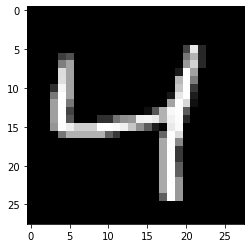

In [3]:
import matplotlib.pyplot as plt

image = x_train[2]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### ___Building the Network___
_Before we start building the network, let’s confirm the shape of the training data. This is important because the shape will be needed by the convolution layer. We’ll use this shape later to reshape the size of the input data._

In [4]:
x_train.shape

(60000, 28, 28)

_We kick off by initializing the sequential model. Then we pass in our layers as a list. The first layer is the reshape layer for changing the shape of the input data. We already know that each image has a size of 28 by 28. We also pass 1 to the reshape layer to ensure that the input data has a single color channel._

_Next, we create the convolution layer. This layer takes in a couple of parameters:_
  * ___filters___: _the number of output filters in the convolution, i.e the number of feature detectors. 32 is a common number of feature detectors used._
  * ___kernel_size___: _the dimensions of the feature detector matrix. This is the width and height of the convolution window._
  * ___input_shape___: _the shape of the input data. Since we included a reshape layer, we don’t need to pass this._
  * ___activation___: _the activation function to be uses. The ReLu activation function is a common choice._

_The next item on the list is to add the pooling layer. In this step, the size of the feature map is reduced by taking the maximum value during the pooling process. 2 by 2 is a commonly-used pool size. This will reduce the size of the feature map while maintaining the most important features needed to identify the digits._

_After that, we flatten the feature maps. This will convert the feature maps into a single column._

_The results obtained above are then passed to the dense layer. The parameters passed to this layer are the number of neurons and the activation function. In this case, those are 128 and ReLu, respectively._

_Finally, we created our output layer. 10 is used here, because our dataset has 10 classes. We’ll use the softmax activation function because classes are mutually exclusive-an image can’t be, for example, classified as numbers 0 and 1 at the same time. If the case was otherwise, we’d use the sigmoid activation function._

In [5]:
model = Sequential()

# Adding Reshape Layer
model.add(Reshape((28,28,1)))

# Adding Convolutional Layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

# Adding Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flattening Layer
model.add(Flatten())

# Adding Fully Connected Network
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### ___Compiling the Network___

_We now need to apply gradient descent to the number. This is done at the compile stage. We pass the following parameters:_

* ___optimizer___ : _the type of gradient descent to use; in this case, we’ll use stochastic gradient descent_
* ___loss___ : _the cost function to use. We use `sparse_categorical_crossentropy` because the classes are integer-encoded. Had we performed one-hot encoding, we’d have to use the categorical cross-entropy loss function._
* ___metrics___ : _the evaluation metrics to monitor; in this case, accuracy_

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### ___Fitting the CNN___
_Next, we fit the training set to the network. epochs is the number of rounds the data will pass through the network. `validation_data` is the test dataset that will be used to evalutate the performance of the model during training._

In [9]:
model_history = model.fit(x = x_train, y = y_train, epochs=5, validation_data = validation_data)

Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1237 - accuracy: 0.9622 - val_loss: 0.0540 - val_accuracy: 0.9823
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0510 - val_accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0402 - val_accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0417 - val_accuracy: 0.9881


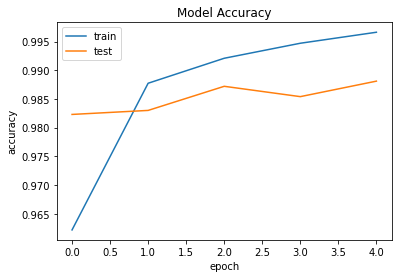

In [10]:
# Summarize Accuracy Improvements

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

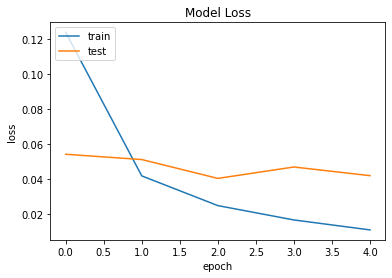

In [11]:
# Summarize Loss Improvements

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

### ___Evaluating the Network___
_We can now check the performance of the network. We do so using the evaluate function, passing in the test set. The first item in the result produced is the loss, and the second is the accuracy._

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0417 - accuracy: 0.9881


[0.04172919690608978, 0.988099992275238]

### ___Checking the Predictions___

In [14]:
predictions = model.predict(x_test)

_For example, let’s check the digit at index 2 in the test set._

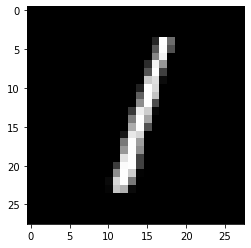

In [15]:
image = x_test[2]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

_This is clearly the digit one. Let’s compare that with the prediction made for digit 1._

In [16]:
import numpy as np
np.set_printoptions(suppress=True)

predictions[2]*100

array([ 0.00000654, 99.998245  ,  0.00004498,  0.00000003,  0.00131378,
        0.00000129,  0.0000288 ,  0.00030686,  0.00003073,  0.00001179],
      dtype=float32)

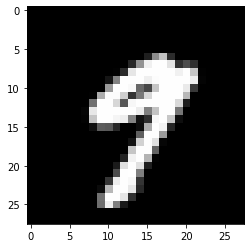

In [17]:
image = x_test[20]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [18]:
predictions[20]*100

array([ 0.00000002,  0.0000004 ,  0.00000002,  0.00014518,  0.00015849,
        0.00003499,  0.        ,  0.00183083,  0.00003117, 99.997795  ],
      dtype=float32)